# Integration of Geomappy into GeoPandas

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
import pyproj
import cartopy.crs as ccrs

os.chdir("../../../")

Loading data on river plastic mobilisation when flood events happen (Roebroek et al., 2021).

In [2]:
df1 = gpd.read_file("data/countries/plastic_mobilisation.shp")
df1.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       ...
       'NAME_ZH', 'e_1', 'e_10', 'e_20', 'e_50', 'e_100', 'e_200', 'e_500',
       'jump', 'geometry'],
      dtype='object', length=103)

Loading data on riverbank plastic observations in the Netherlands (Van Emmerik et al., 2020)

In [3]:
df2 = gpd.read_file("data/processed_data_SDN/df_locations.geojson")
df2.columns

Index(['Gebiedscode', 'river', 'x_maas', 'x_waal', 'geometry'], dtype='object')

## Outline on a world map

The first file covers the world, while the second file covers the Netherlands. Both have different projections. To see this at work, geomappy integrates two functions to explore the data: ``plot_world`` and ``plot_file``.

<GeoAxesSubplot:>

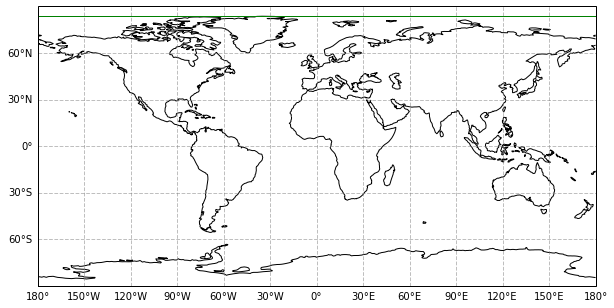

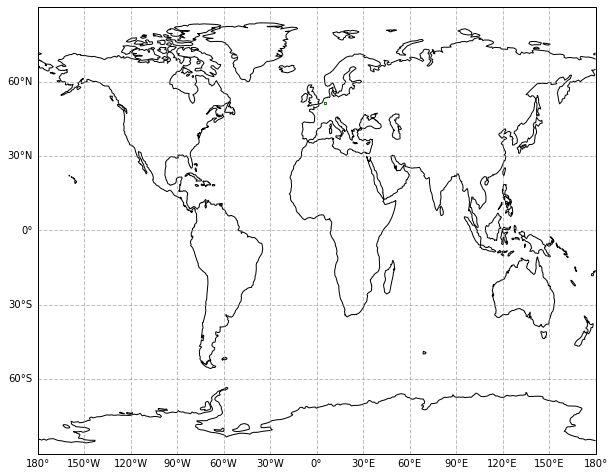

In [4]:
df1.plot_world()
df2.plot_world()
plt.show()

<GeoAxesSubplot:>

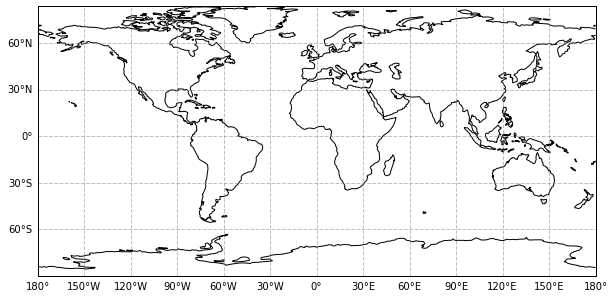

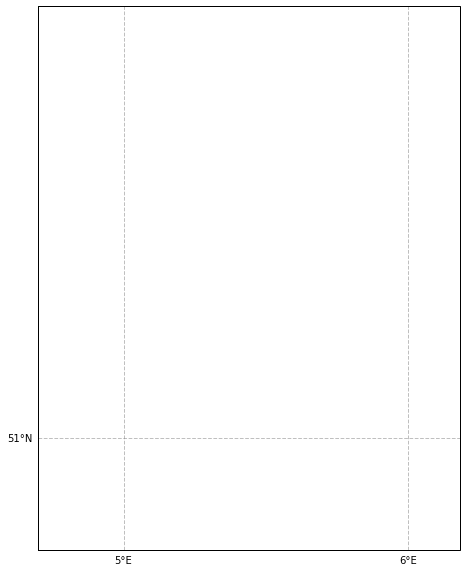

In [5]:
df1.plot_file()
df2.plot_file(xticks=1, yticks=1, resolution='10m')
plt.show()

Note that the second file does not intersect with the coastline, so an empty map appears.

## Plotting the data

The geomappy plotting functionality (``plot_shapes``) is directly integrated into geopandas by loading geomappy. This results in the same figure as seen before:

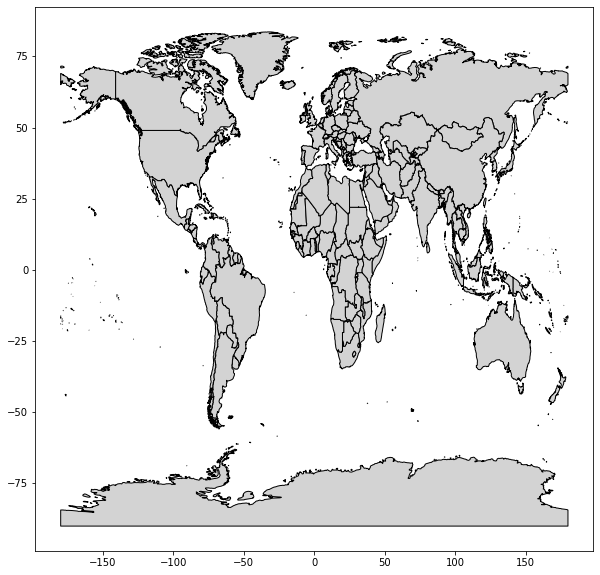

In [6]:
df1.plot_shapes()
plt.show()

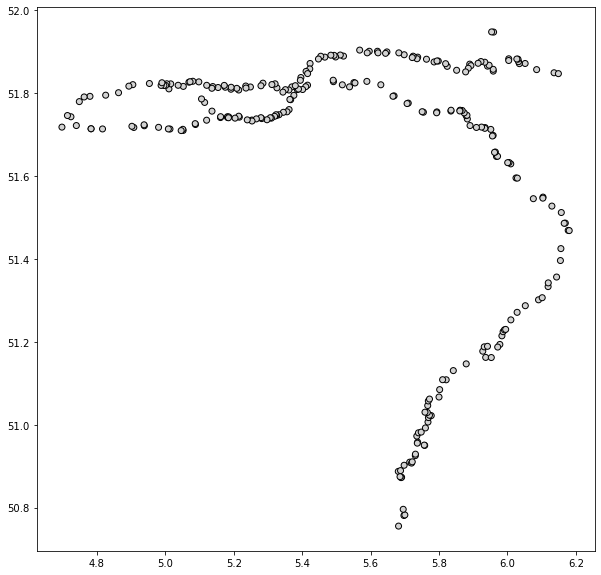

In [7]:
df2.plot_shapes()
plt.show()

Again all plotting functionaly of ``plot_shapes`` is available. This is shown here by reproducing the same map as in the tutorial on choropleth continues shapes tutorial

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f1de703a130>)

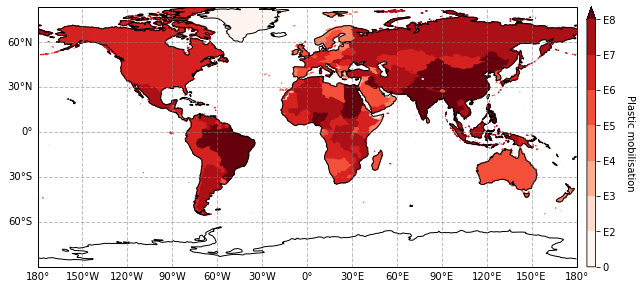

In [8]:
df1.plot_shapes(values='e_10', basemap=True, cmap="Reds", bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], bin_labels = [0, "E2", "E3", "E4", "E5", "E6", "E7", "E8"], figsize=(10,10), pad_fraction=1.2, legend_kwargs=dict(label="Plastic mobilisation", label_font=dict(rotation=270, labelpad=20)))
plt.show()

## Plotting on different projections

Different plotting projections are available by passing a caropty Projection object to the ``projection`` parameter.

(<AxesSubplot:>, None)

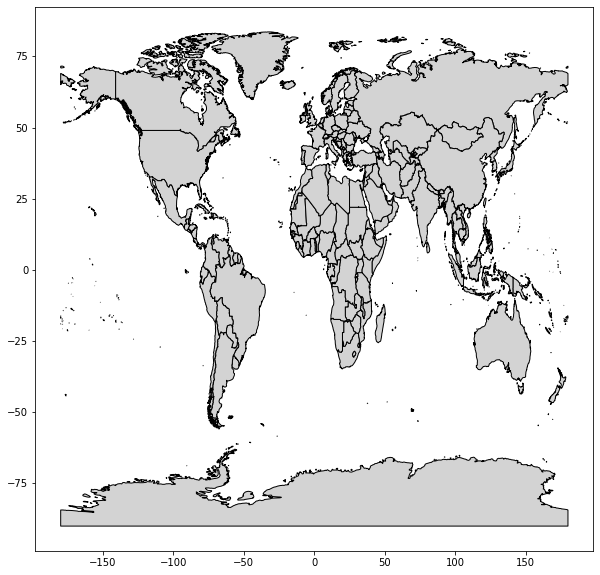

In [9]:
df1.plot_shapes(projection=ccrs.Mercator())
plt.show()

(<GeoAxesSubplot:>, None)

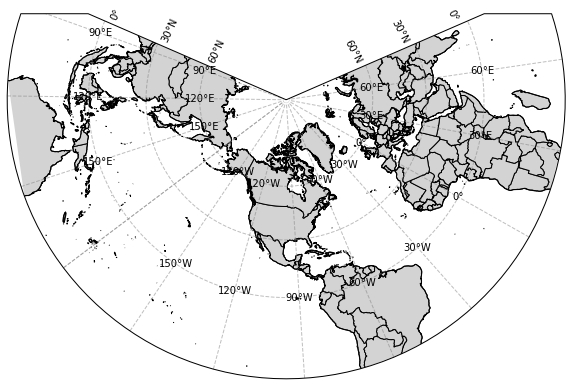

In [12]:
ax = mp.basemap(projection=ccrs.LambertConformal())
df1.plot_shapes(ax=ax)
plt.show()

(<GeoAxesSubplot:>, None)

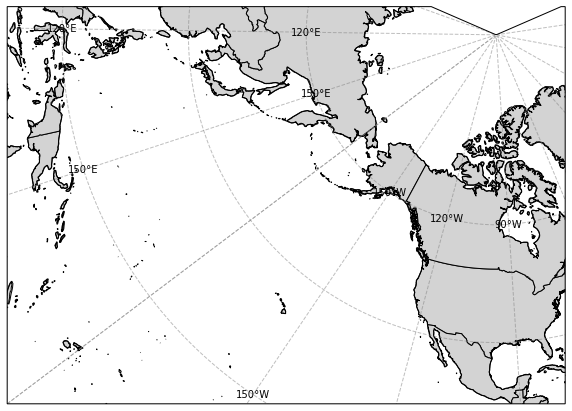

In [15]:
df1.plot_shapes(projection=ccrs.LambertConformal(), basemap=True)
plt.show()